In [1]:
# Initial imports.
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#Load data
ml_df=pd.read_csv('ml_data.csv')
ml_df.head()

,Unnamed: 0,state,date,max_temp,humidity,cloudiness,wind_speed,description,2012,2013,...,healh_care,cost_of_living,prop_to_income_ratio,traffic_comm_time,pollution,climate,city,latitude,longitude,high_q
0,0,HI,2023-03-02 01:23:39,74.30,92,40,14.97,Government Expenditures,143873.0,161946.0,...,72.5,103.0,9.2,41.3,37.3,95.3,Kahului,20.8947,-156.470,0
1,1,HI,2023-03-02 01:23:40,75.52,66,75,25.32,Government Expenditures,143873.0,161946.0,...,72.5,103.0,9.2,41.3,37.3,95.3,Kapaa,22.0752,-159.319,0
2,2,NE,2023-03-02 01:23:40,32.88,78,0,13.80,Government Expenditures,86848.0,96517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Douglas,41.3000,-96.167,0
3,3,CA,2023-03-02 01:22:25,30.81,58,0,8.05,Government Expenditures,2779588.0,2790242.0,...,69.0,82.8,8.4,35.5,40.0,97.1,Susanville,40.4163,-120.653,1
4,9,HI,2023-03-02 01:23:41,71.11,90,89,5.01,Government Expenditures,143873.0,161946.0,...,72.5,103.0,9.2,41.3,37.3,95.3,Hilo,19.7297,-155.090,0


In [3]:
ml_df.shape

(1189, 33)

In [4]:
ml_df.dropna(subset=['qol_index'], inplace=True)

In [5]:
ml_df.shape

(873, 33)

In [6]:
ml_df.columns

Index(['Unnamed: 0', 'state', 'date', 'max_temp', 'humidity', 'cloudiness',
       'wind_speed', 'description', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', 'sum_passengers', 'city_rank',
       'qol_index', 'purchase_power', 'safety', 'healh_care', 'cost_of_living',
       'prop_to_income_ratio', 'traffic_comm_time', 'pollution', 'climate',
       'city', 'latitude', 'longitude', 'high_q'],
      dtype='object')

In [23]:
#Define the set of features
X=ml_df.copy()
X=X.drop(['Unnamed: 0', 'state', 'date', 'description', 'sum_passengers', '2012','2013','2014','2015','2016','city_rank','latitude', 'longitude','qol_index','city', 'high_q'], axis=1)
X.head()

#NOTE:  we began dropping more columns to see if the model would be impacted.  The overall accuracy was still 100%, but the original top feature was '2014', without '2014', the top feature was 'safety'.
#In both tested cases, 'health_care' was the second most important feature

,max_temp,humidity,cloudiness,wind_speed,2017,2018,2019,2020,2021,purchase_power,safety,healh_care,cost_of_living,prop_to_income_ratio,traffic_comm_time,pollution,climate
0,74.30,92,40,14.97,186628.0,191721.0,184088.0,188410.0,204287.0,75.4,52.4,72.5,103.0,9.2,41.3,37.3,95.3
1,75.52,66,75,25.32,186628.0,191721.0,184088.0,188410.0,204287.0,75.4,52.4,72.5,103.0,9.2,41.3,37.3,95.3
3,30.81,58,0,8.05,3222411.0,3331340.0,3248535.0,3367605.0,3654322.0,114.2,59.6,69.0,82.8,8.4,35.5,40.0,97.1
4,71.11,90,89,5.01,186628.0,191721.0,184088.0,188410.0,204287.0,75.4,52.4,72.5,103.0,9.2,41.3,37.3,95.3
5,26.11,54,100,25.32,114427.0,122910.0,119480.0,124424.0,139082.0,112.1,38.1,61.2,85.8,2.5,26.8,15.7,41.6


In [8]:
X.dtypes

max_temp                float64
humidity                  int64
cloudiness                int64
wind_speed              float64
2017                    float64
2018                    float64
2019                    float64
2020                    float64
2021                    float64
purchase_power          float64
safety                  float64
healh_care              float64
cost_of_living          float64
prop_to_income_ratio    float64
traffic_comm_time       float64
pollution               float64
climate                 float64
dtype: object

In [9]:
#Define the target variable
y=ml_df['high_q'].values

y[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
# Split Data Set for Training and Testing
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [11]:
# Determine the shape of the sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(654, 17)
(219, 17)
(654,)
(219,)


In [12]:
# Scale the data, create the instance
scaler = StandardScaler()

# Fit it with the training data
X_scaler = scaler.fit(X_train)

# Transform it
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create the RandomForestClassifier
# n_estimators is the number of trees.  We start with 128
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 78)

In [14]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# Make the predictions with testing inputs
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [16]:
# Evaluate the model with the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame
cm_df = pd.DataFrame(
    cm, index = ["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,120,0
Actual 1,0,99


In [17]:
# Calculate the accuracy score. 

acc_score = accuracy_score(y_test, predictions)
acc_score

1.0

In [18]:
# Display results
# Display all the results

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score:\t\t {acc_score}")
print("\nClassification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,120,0
Actual 1,0,99


Accuracy Score:		 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        99

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



In [19]:
importances = rf_model.feature_importances_

importances

array([3.61606176e-02, 5.88270119e-04, 2.89941211e-03, 2.70224749e-05,
       5.69624520e-02, 6.91433305e-02, 5.44109900e-02, 8.79482887e-02,
       1.18152151e-01, 3.50462974e-02, 1.40244410e-01, 1.30462377e-01,
       1.09292922e-02, 3.03681325e-02, 6.99655491e-02, 6.06181141e-02,
       9.60732928e-02])

In [20]:
# Sort the importances
sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)

[(0.1402444096298895, 'safety'),
 (0.1304623773414553, 'healh_care'),
 (0.11815215147390867, '2021'),
 (0.09607329276849791, 'climate'),
 (0.08794828869074511, '2020'),
 (0.06996554911068223, 'traffic_comm_time'),
 (0.06914333054969309, '2018'),
 (0.0606181140914482, 'pollution'),
 (0.05696245202295112, '2017'),
 (0.05441098995328386, '2019'),
 (0.03616061756685184, 'max_temp'),
 (0.03504629743712889, 'purchase_power'),
 (0.03036813247620957, 'prop_to_income_ratio'),
 (0.010929292186360956, 'cost_of_living'),
 (0.002899412107146772, 'cloudiness'),
 (0.0005882701188193386, 'humidity'),
 (2.7022474927641522e-05, 'wind_speed')]

[3.61606176e-02 5.88270119e-04 2.89941211e-03 2.70224749e-05
 5.69624520e-02 6.91433305e-02 5.44109900e-02 8.79482887e-02
 1.18152151e-01 3.50462974e-02 1.40244410e-01 1.30462377e-01
 1.09292922e-02 3.03681325e-02 6.99655491e-02 6.06181141e-02
 9.60732928e-02]


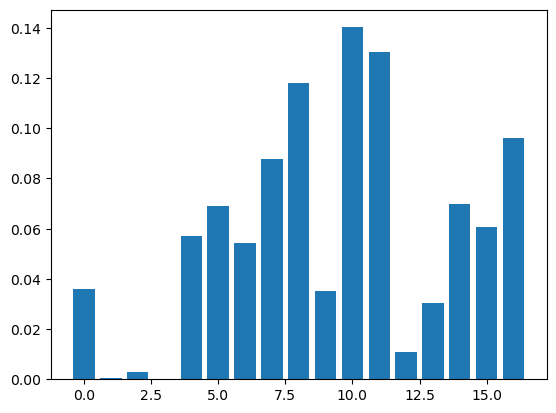

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

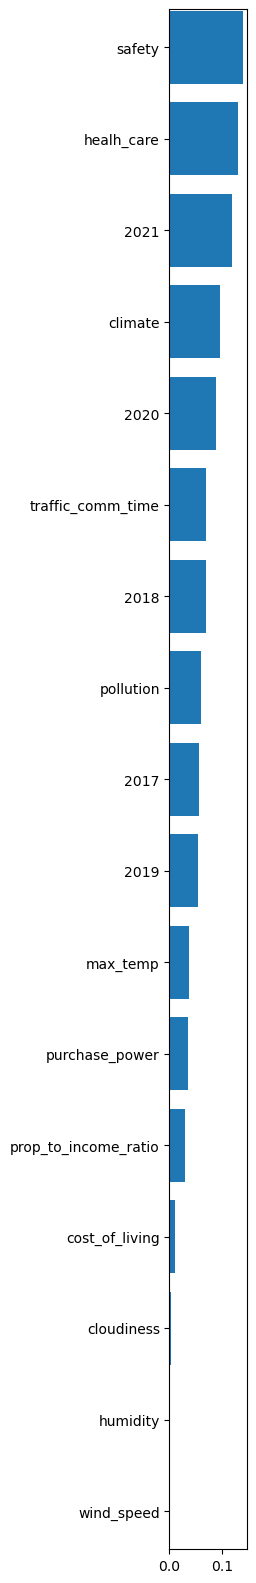

In [22]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(1,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()